In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree

In [107]:
company=pd.read_csv("C:\\Users\\prasa\\Downloads\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [108]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [109]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [110]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [111]:
# Some columns are in categorical type, let's transform them into numerical type. 

In [112]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in company.columns:
    print(i)
    if company[i].dtypes== object:
        company[i]=encoder.fit_transform(company[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US


In [113]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [114]:
# The target variable 'Sales' is in numerical form. convert it into categorical type.

In [115]:
status=[]

for i in company['Sales']:
    if i<=7.49:
        status.append('low')
    else:
        status.append('high')
company['status']= status

In [116]:
# Remove Sales column from data
company1=company.drop('Sales', axis=True)
company1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low


In [117]:
x = company1.iloc[:, 0:10]
y = company1['status']

In [118]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [119]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: status, Length: 400, dtype: object

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

## Bagging Method

In [121]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
cart = DecisionTreeClassifier()
num_trees = 100
kfold = KFold(n_splits=10)
model1 = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=40)
results = cross_val_score(model1, x,y, cv=kfold)
print(results.mean())

0.8175000000000001


In [123]:
#Predicting on test data
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test)
pd.Series(preds1).value_counts() 

low     62
high    58
dtype: int64

In [124]:
pd.crosstab(y_test,preds1)

col_0,high,low
status,,
high,43,19
low,15,43


In [125]:
#Accuracy
Accuracy=model1.score(x_test, y_test)
print('Bagging Method Accuracy is', Accuracy)

Bagging Method Accuracy is 0.7166666666666667


## Random Forest Classification

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [127]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)

model2 = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=40)
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.8099999999999999


In [128]:
#Predicting on test data
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

low     62
high    58
dtype: int64

In [129]:
pd.crosstab(y_test,preds2)

col_0,high,low
status,,
high,45,17
low,13,45


In [130]:
Accuracy2= model2.score(x_test,y_test)
print('Random Forest Accuracy is', Accuracy2)

Random Forest Accuracy is 0.75


## AdaBoost Classification

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [132]:
num_trees = 100
kfold = KFold(n_splits=8)
model3 = AdaBoostClassifier(n_estimators=num_trees,random_state=10)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())


0.8400000000000001


In [133]:
#Predicting on test data
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test)
pd.Series(preds3).value_counts()

low     62
high    58
dtype: int64

In [134]:
pd.crosstab(y_test,preds3)

col_0,high,low
status,,
high,50,12
low,8,50


In [135]:
Accuracy3= model3.score(x_test,y_test)
print('AdaBoost Accuracy is', Accuracy3)

AdaBoost Accuracy is 0.8333333333333334


## Stacking Ensemble for Classification

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [137]:
import warnings
warnings.filterwarnings("ignore")

In [138]:
kfold = KFold(n_splits=10)
# create the sub models
estimators = []
m1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', m1))
m2 = DecisionTreeClassifier()
estimators.append(('cart', m2))
m3 = SVC()
estimators.append(('svm', m3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7849999999999999


## Use iteration to calculate different k in models, then return the average accuracy based on the cross validation

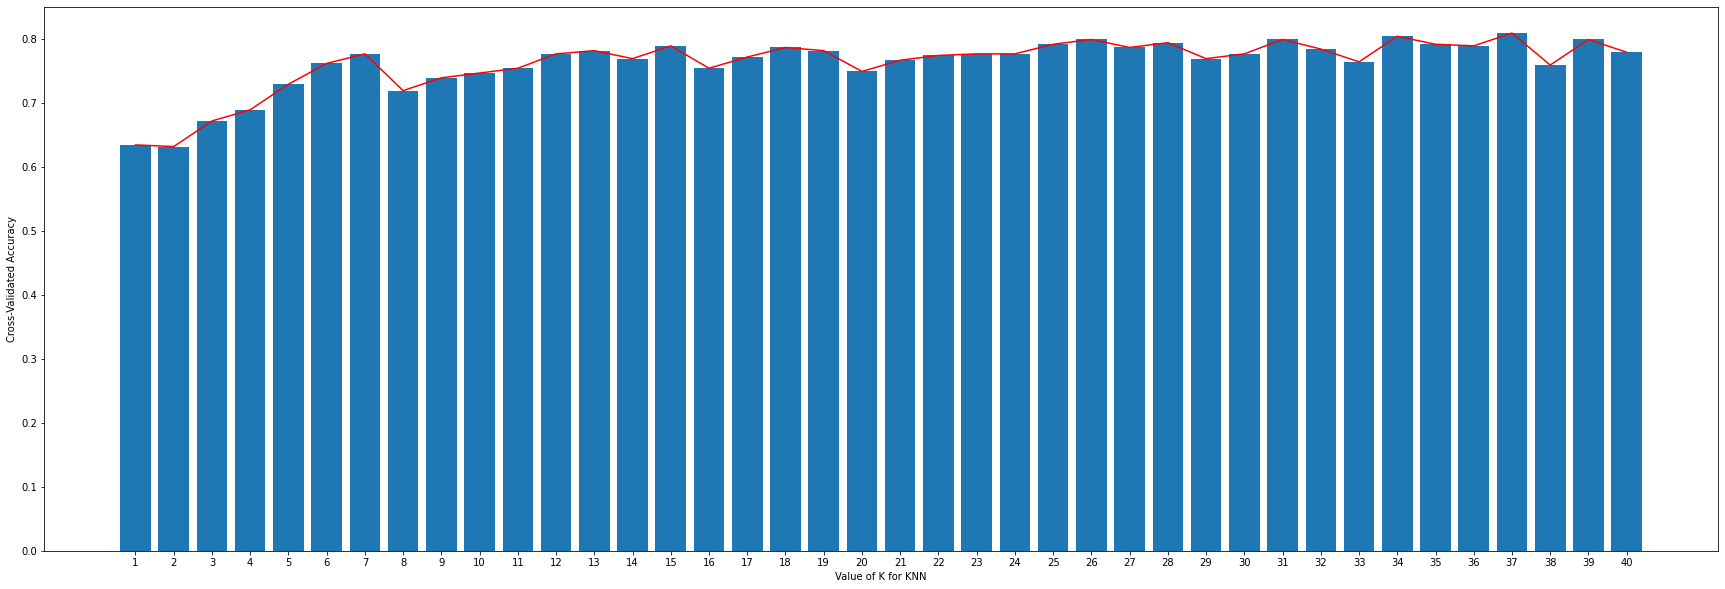

In [139]:
k_range =range(1,41)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(30,10))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [140]:
k_scores

[0.635,
 0.6325000000000001,
 0.6725,
 0.6900000000000001,
 0.73,
 0.7625,
 0.7775000000000001,
 0.72,
 0.74,
 0.7474999999999999,
 0.7550000000000001,
 0.7775000000000001,
 0.7825,
 0.7700000000000001,
 0.7900000000000001,
 0.755,
 0.7725000000000001,
 0.7875,
 0.7825000000000001,
 0.7500000000000001,
 0.7675,
 0.775,
 0.7775,
 0.7775,
 0.7925,
 0.8,
 0.7875,
 0.7949999999999999,
 0.7699999999999999,
 0.7775000000000001,
 0.7999999999999999,
 0.785,
 0.765,
 0.805,
 0.7925,
 0.7899999999999999,
 0.8099999999999999,
 0.76,
 0.8,
 0.78]

# AdaBoost method is best to increase Sales